In [72]:
import pandas as pd
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from unidecode import unidecode
import os

In [73]:
# Create a reference the CSV file desired
csv_path = "training.1600000.processed.noemoticon.csv"

# Read the CSV into a Pandas DataFrame
df = pd.read_csv(csv_path,encoding = "ISO-8859-1",index_col=False,  
                  names = ["sentiment", "ID", "date","flag", "user","text"])


In [74]:
df.head()

,sentiment,ID,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [75]:
# Run Vader analysis List to hold results
results_list = []


# Loop through all target users
for (idx, row) in text.iterrows():
    

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    
  
    results = analyzer.polarity_scores(row["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]

    # Add each value to the appropriate list
    compound_list.append(compound)
    positive_list.append(pos)
    negative_list.append(neg)
    neutral_list.append(neu)
                
           

    # Store the Average Sentiments
    sentiment = {
        "tweet": row["text"],
        "Compound": compound,
        "Positive": pos,
        "Neutral": neg,
        "Negative": neu,
        'sentiment':row["sentiment"],
        
    }

#     # Print the Sentiments
#     print(sentiment)
#     print()
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

In [ ]:
## Export measure_df_clean file as a CSV
output_path = os.path.join('CSV_cleaned', 'tweets_clean.csv')
results_df.to_csv(output_path, index=False, header=True)

In [76]:
results_df = pd.DataFrame(results_list).set_index("tweet").round(3)
results_df.reset_index(level=0, inplace=True)
results_df.head()


,tweet,Compound,Negative,Neutral,Positive,sentiment
0,I didn't realize I missed 11:11 until now. I g...,-0.299,0.750,0.155,0.094,0
1,In a very shitty mood .. cuz i slept this afte...,-0.933,0.533,0.467,0.000,0
2,@kanjibeauty I know. I just don't like packing,-0.276,0.703,0.297,0.000,4
3,Photo: frageelay: mmmm yesss haha greatest mus...,0.361,0.558,0.175,0.268,4
4,I'm hoping Mine That Bird wins,0.758,0.381,0.000,0.619,4


In [77]:
len(results_df)

80

In [79]:
results_df = results_df.sample(frac=0.5)
results_df.head()

,tweet,Compound,Negative,Neutral,Positive,sentiment
21,@kfirpavda - I just stole your &quot; sharing ...,0.735,0.563,0.000,0.437,4
30,@mileycyrus http://twitpic.com/3pf7v - perfect,0.572,0.351,0.000,0.649,4
66,happy mother's day. so happy i got to have bre...,0.813,0.575,0.000,0.425,4
18,enrollment tomorrow.. i can't wait! i can't ...,0.000,1.000,0.000,0.000,4
67,"@RyanSeacrest r u kidding me! what a tease, t...",0.679,0.495,0.114,0.391,4


In [80]:
len(results_df)

40

In [81]:
## Fit the scale of original sp its comparable to Vader analysis results

results_df.loc[results_df['sentiment'] == 0, 'ori'] = '-1.0'
results_df.loc[results_df['sentiment'] == 3, 'ori'] = '0.0'
results_df.loc[results_df['sentiment'] == 4, 'ori'] = '1.0'
results_df.head()

,tweet,Compound,Negative,Neutral,Positive,sentiment,ori
21,@kfirpavda - I just stole your &quot; sharing ...,0.735,0.563,0.000,0.437,4,1.0
30,@mileycyrus http://twitpic.com/3pf7v - perfect,0.572,0.351,0.000,0.649,4,1.0
66,happy mother's day. so happy i got to have bre...,0.813,0.575,0.000,0.425,4,1.0
18,enrollment tomorrow.. i can't wait! i can't ...,0.000,1.000,0.000,0.000,4,1.0
67,"@RyanSeacrest r u kidding me! what a tease, t...",0.679,0.495,0.114,0.391,4,1.0


In [84]:
results_df['length'] = results_df['tweet'].apply(len)
results_df.head()

,index,tweet,Compound,Negative,Neutral,Positive,sentiment,ori,length
0,21,@kfirpavda - I just stole your &quot; sharing ...,0.735,0.563,0.000,0.437,4,1.0,66
1,30,@mileycyrus http://twitpic.com/3pf7v - perfect,0.572,0.351,0.000,0.649,4,1.0,47
2,66,happy mother's day. so happy i got to have bre...,0.813,0.575,0.000,0.425,4,1.0,69
3,18,enrollment tomorrow.. i can't wait! i can't ...,0.000,1.000,0.000,0.000,4,1.0,83
4,67,"@RyanSeacrest r u kidding me! what a tease, t...",0.679,0.495,0.114,0.391,4,1.0,91


In [85]:
# results_df.reset_index(level=0, inplace=True)
results_df.reset_index(level=0, inplace=True)
results_df.head()

,level_0,index,tweet,Compound,Negative,Neutral,Positive,sentiment,ori,length
0,0,21,@kfirpavda - I just stole your &quot; sharing ...,0.735,0.563,0.000,0.437,4,1.0,66
1,1,30,@mileycyrus http://twitpic.com/3pf7v - perfect,0.572,0.351,0.000,0.649,4,1.0,47
2,2,66,happy mother's day. so happy i got to have bre...,0.813,0.575,0.000,0.425,4,1.0,69
3,3,18,enrollment tomorrow.. i can't wait! i can't ...,0.000,1.000,0.000,0.000,4,1.0,83
4,4,67,"@RyanSeacrest r u kidding me! what a tease, t...",0.679,0.495,0.114,0.391,4,1.0,91


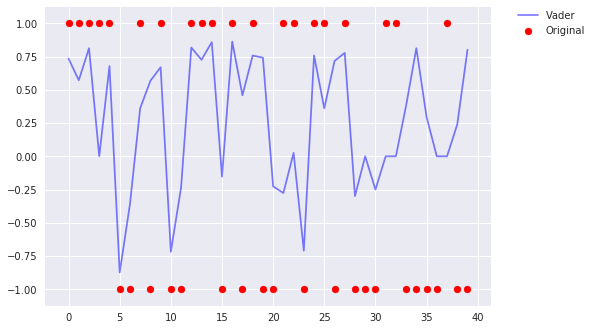

In [86]:
import matplotlib.pyplot as plt


# plt.scatter(results_df["level_0"], pd.to_numeric(results_df.ori, errors='coerce'), color="red", label="Original")
# plt.scatter(results_df["level_0"], results_df["Compound"], color="blue",alpha=0.5, label="Vader")


# plt.plot(results_df["level_0"],  pd.to_numeric(results_df.ori, errors='coerce'), color="red", label="Original")
plt.plot(results_df["level_0"], results_df["Compound"], color="blue" ,alpha=0.5, label="Vader")

plt.scatter(results_df["level_0"],  pd.to_numeric(results_df.ori, errors='coerce'), color="red", label="Original")


# plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
# plt.ylim(10,-10) #Bonus
# plt.ylabel("Tweet Polarity")
# plt.xlabel("Tweets Ago")
## create Legend and place outside of graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()
plt.style.use('seaborn')